<a href="https://colab.research.google.com/github/muyale/Data-Science/blob/main/Solar_Power.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import statsmodels.api as sn
import datetime
#link to data_set https://www.kaggle.com/code/lumierebatalong/solar-power-machine-learning-i/data?select=Plant_1_Weather_Sensor_Data.csv

In [5]:
plant1_generation = pd.read_csv("/content/Plant_1_Generation_Data.csv")
plant1_weather = pd.read_csv("/content/Plant_1_Weather_Sensor_Data (1).csv")

In [6]:
plant1_generation.head()
plant1_weather.head()
#Checking for null values in our datasets
plant1_weather.info()
plant1_generation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-

In [7]:
plant1_generation.tail()
plant1_weather.tail()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0
3181,2020-06-17 23:45:00,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0


In [ ]:
# Computing the sum of the 22 inverters since output is recorded after 15 mins
plant1_generation =plant1_generation.groupby('DATE_TIME')[['DC_POWER','AC_POWER','DAILY_YIELD','TOTAL_YIELD']].agg('sum')
plant1_generation = plant1_generation.reset_index()
#We convert DATE_TIME object time to datetime type
plant1_generation['DATE_TIME'] = pd.to_datetime(plant1_generation['DATE_TIME'])
plant1_generation['time'] = plant1_generation['DATE_TIME'].dt.time
plant1_generation['date'] = pd.to_datetime(plant1_generation['DATE_TIME'].dt.date)
plant1_generation.head(5)

"""EDA FOR DC AND AC POWER AND YIELD
Here we will perfom data analysis using the following plots
.Line Plot
.Change Rate
.Box and Whisker Plot
.Calendar Plot
.Bar Chart
"""

Text(0.5, 1.0, 'DC_POWER PLOT')

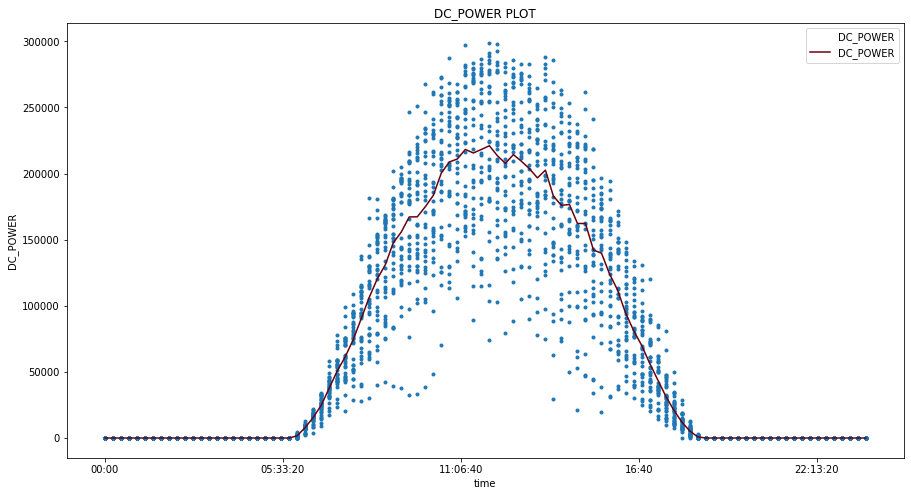

In [22]:
plant1_generation.plot(x='time',y='DC_POWER',style='.',figsize=(15,8))
plant1_generation.groupby('time')['DC_POWER'].agg('mean').plot(legend=True,colormap='Reds_r')
plt.ylabel('DC_POWER')
plt.title('DC_POWER PLOT')

"""Between 5:30 and 16:40 ,most of the dc power was produced because of sunlight

In [ ]:
calendar_dc = plant1_generation.pivot_table(values='DC_POWER',index='time',columns='date')
calendar_dc

In [45]:
# Now we create a function that creates a multiplot
def multi_plot(data=None,row=None,col=None,title='DC_POWER'):
  cols =data.columns
  gp=plt.figure(figsize=(20,20))
  gp.subplots_adjust(wspace=0.2,hspace=0.8)
  for i in range(1,len(cols)+1):
    ax =gp.add_subplot(row,col,i)
    data[cols[i-1]].plot(ax=ax,style='k.')
    ax.set_title('{}{}'.format(title,cols[i-1]))


In [ ]:
multi_plot(calendar_dc,row =9 ,col =4)

In [ ]:
daily_dc = plant1_generation.groupby('date')['DC_POWER'].agg('sum')
daily_dc.plot.bar(figsize=(15,5),legend=True)
plt.title('Daily DC Power')

In [ ]:
plant1_generation.groupby('time')['DAILY_YIELD'].agg('mean').plot(legend=True,colormap='Reds_r')
plt.title('Daily Yield')
plt.ylabel('Daily_Yield')


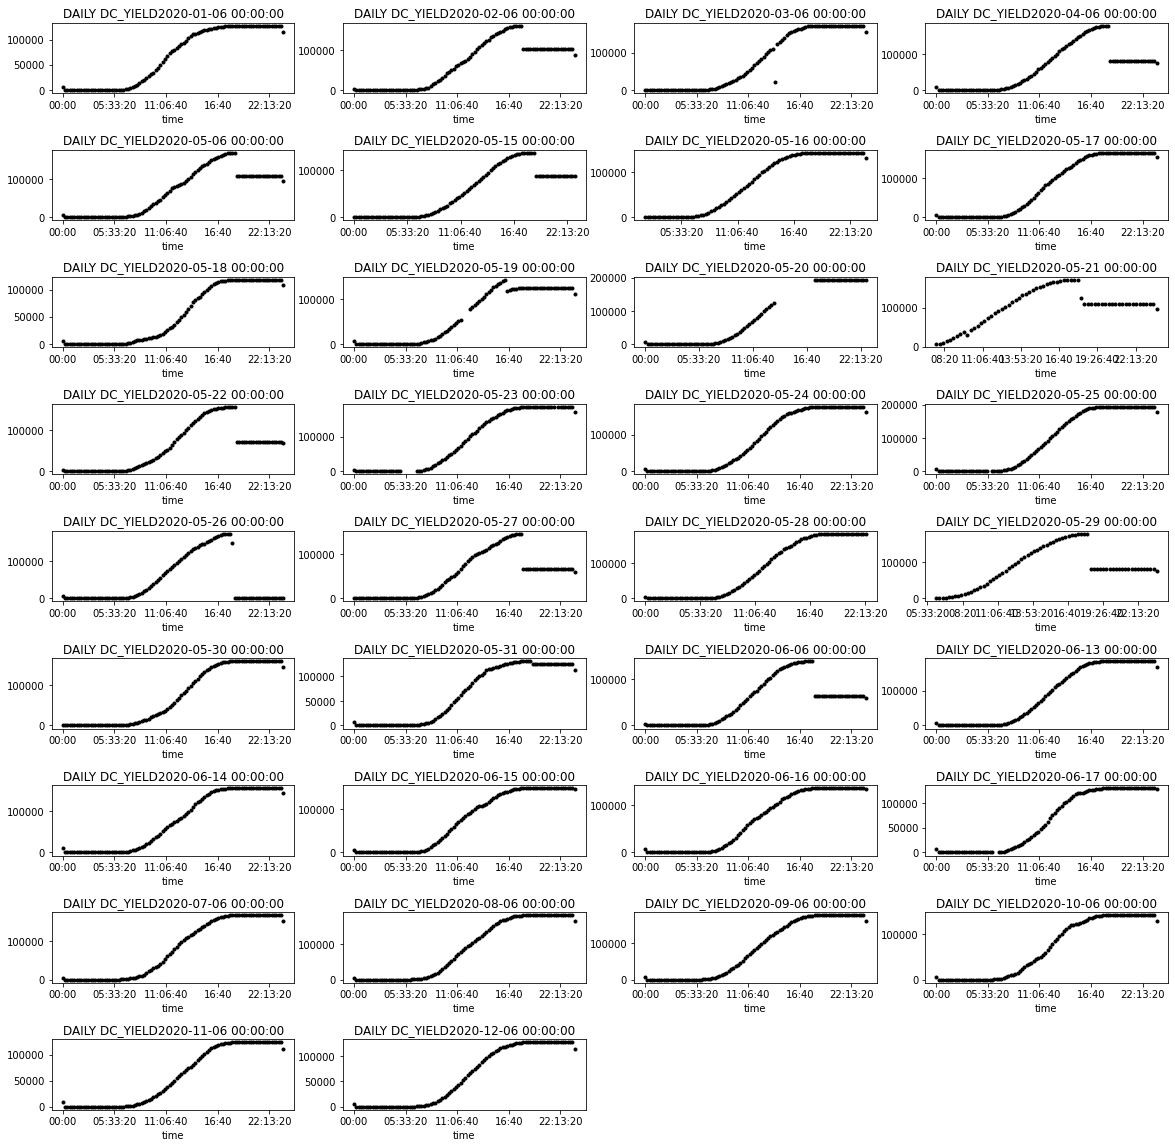

In [66]:
#Pivoting the daily yield table so we create a multtiplot
daily_yield =plant1_generation.pivot_table(values='DAILY_YIELD',index='time',columns='date')
multi_plot(data=daily_yield,row=9,col=4,title='DAILY DC_YIELD')